In [1]:
import mesa
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from Model_Ilya_Play_Area import *

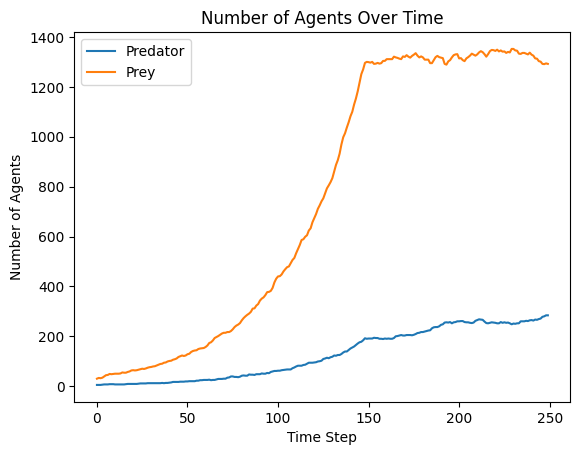

In [3]:
#Making x steps with in the model
x = 250

model = Microbiome(5, 30, False, 25, 25, immediate_killing = False)
for i in range(x):
    model.step()

# Check the numbers of agents

agent_num_data = model.datacollector.get_model_vars_dataframe()
num_of_agents_1 = agent_num_data.loc[:,"Type_a_1"]
num_of_agents_2 = agent_num_data.loc[:,"Type_a_2"]
number_of_time_steps = agent_num_data.index

# Plotting the number of agents over time
plt.plot(number_of_time_steps, num_of_agents_1, label = "Predator")
plt.plot(number_of_time_steps, num_of_agents_2, label = "Prey")

# Adding labels and title
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Number of Agents')
plt.title('Number of Agents Over Time')

# Displaying the plot
plt.show()

In [ ]:
# Initial conditions: 3 predators, 30 preys, 1% aggressiveness

# Run time with radius increment 1 and microcolony function based on coordinates:

    # 200 steps:

        # 3.10
        # 3.03
        # 2.51
        # 2.33

    # 300 steps:

        # 9.23
        # 7.32
        # 11.59

# Run time with radius increment 1 and microcolony function based on agents:
    
    # 200 steps:

        #  > 7 mins

# Run time with radius increment 5 and microcolony function based on coordinates:
    
    # 200 steps:

        # 1.49
        # 1.17
        # 2.47

    # 300 steps:

        # 11.07
        #
        #

In [ ]:
# Agent based microcolony growth did not turn out to be faster:
# Still come back to it, because it might be slower in the initial stage of the simulation but faster once the grid is full

def microcolony_growth(self, bacteria_to_move, starting_radius, checked_neighbors_bacteria, max_search_radius):
       
        if starting_radius > max_search_radius:
            return True
        
        increased_neighbors = self.model.grid.get_neighbors(bacteria_to_move.pos, moore = True, include_center = True, radius = starting_radius + 1)
        increased_neighbors_bacteria = [i for i in increased_neighbors if not isinstance(i, Soil)]
        unchecked_neighbors_bacteria = list(set(increased_neighbors_bacteria) - set(checked_neighbors_bacteria))

        bacteria_coordinates = list(map(lambda bacteria: bacteria.pos, unchecked_neighbors_bacteria))
        bacteria_coordinates_freq = Counter(bacteria_coordinates)

        for value, count in bacteria_coordinates_freq.items():
            
            if count < self.max_num_bacteria_in_cell:
                 
                expansion_neighbours_contents = self.model.grid.get_neighbors(value, moore =  True, include_center = True, radius = 1)
                own_type = [e for e in expansion_neighbours_contents if isinstance(e, Type_a_2)]

                if len(own_type) > 0:

                    self.model.grid.move_agent(bacteria_to_move, value)
                    return False
                
        return self.microcolony_growth(bacteria_to_move, starting_radius + 1, increased_neighbors_bacteria, max_search_radius)